In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

from scipy.stats import randint

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# Import dataframe

mat = pd.read_csv('student-mat.csv', sep=';')
por = pd.read_csv('student-por.csv', sep=';')
both = pd.merge(mat, por, how='outer', suffixes=['_mat','_por'], on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [3]:
# Encoding dummy variables

math = pd.get_dummies(mat, drop_first=True)
port = pd.get_dummies(por, drop_first=True)

# **Portuguese Dataset**

In [4]:
# Train & Test samples for Portuguese

Xp = port.drop('G3', axis=1)
yp = port['G3']

Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp,yp, test_size=0.2, random_state=24)

In [5]:
# Repeated K-Fold cross validator

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=24)

# **Linear Regression**

In [27]:
# Linear Regression (GridSearchCV)

linear = LinearRegression()
params = {'normalize':[True,False],
         'copy_X':[True,False],
         'n_jobs':[0,1,2,3,4]}

linear_grid = GridSearchCV(linear, params, cv = 5)
linear_grid.fit(Xp_train, yp_train)
print(linear_grid.best_params_)

{'copy_X': True, 'n_jobs': 0, 'normalize': True}


In [6]:
# Linear Regression (Final)

linear_final = LinearRegression(normalize = True, copy_X = True, n_jobs = 0)
linear_final.fit(Xp_train, yp_train)

r2_linear_final_score = cross_val_score(linear_final,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("R2 Cross Validation Score: ",r2_linear_final_score)

mse_linear_final_score = abs(cross_val_score(linear_final,Xp_train, yp_train,cv=cv, scoring='neg_mean_squared_error').mean())
print("MSE Cross Validation Score: ",mse_linear_final_score)

R2 Cross Validation Score:  0.8281572825499037
MSE Cross Validation Score:  1.735439846728204


In [7]:
# Linear Regression (Original)

linear = LinearRegression()
linear.fit(Xp_train, yp_train)

r2_linear_score = cross_val_score(linear,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("R2 Cross Validation Score: ", r2_linear_score)

mse_linear_score = abs(cross_val_score(linear,Xp_train, yp_train,cv=cv, scoring='neg_mean_squared_error').mean())
print("MSE Cross Validation Score: ", mse_linear_score)

R2 Cross Validation Score:  0.8281572825499036
MSE Cross Validation Score:  1.7354398467282033


# **Ridge**

In [11]:
# Ridge (GridSearchCV)

ridge = Ridge()

params = {'alpha':[1,5,10,11,12,15,20,100, 150, 200, 250],
          'normalize':[True,False],
         'copy_X':[True,False],
         'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridge_grid = GridSearchCV(ridge, params, cv = 5)
ridge_grid.fit(Xp_train,yp_train)

print(ridge_grid.best_params_)

{'alpha': 150, 'copy_X': False, 'normalize': False, 'solver': 'saga'}


In [8]:
# Ridge (Final)

ridge_final = Ridge(alpha=150, normalize = False, copy_X = False, solver = 'saga')
ridge_final.fit(Xp_train,yp_train)

r2_ridge_final_score = cross_val_score(ridge_final, Xp_train, yp_train, cv=cv, scoring='r2').mean()
print("R2 Cross Validation Score: ", r2_ridge_final_score)

mse_ridge_final_score = abs(cross_val_score(ridge_final, Xp_train, yp_train, cv=cv, scoring='neg_mean_squared_error').mean())
print("MSE Cross Validation Score: ", mse_ridge_final_score)

R2 Cross Validation Score:  0.8377838614020355
MSE Cross Validation Score:  1.6629567821803806


In [9]:
# Ridge (Original)

ridge = Ridge()
ridge.fit(Xp_train,yp_train)

r2_ridge_score = cross_val_score(ridge, Xp_train, yp_train, cv=cv, scoring='r2').mean()
print("R2 Cross Validation Score: ", r2_ridge_score)

mse_ridge_score = abs(cross_val_score(ridge, Xp_train, yp_train, cv=cv, scoring='neg_mean_squared_error').mean())
print("MSE Cross Validation Score: ", mse_ridge_score)

R2 Cross Validation Score:  0.8288077855634158
MSE Cross Validation Score:  1.730412295686312


# **Lasso**

In [124]:
# Lasso (GridSearchCV)

lasso = Lasso()

params = {'alpha':[0.01,0.1,1,2,3,4,5,6,10],
          'max_iter':[500,1000,1500,2000],
          'normalize':[0.01,0.1,1,2,3,4,5,False],
          'warm_start':[True,False],
         'copy_X':[True,False],
         'selection':['cyclic','random']}

lasso_grid = GridSearchCV(lasso, params, cv = 5)


lasso_grid.fit(Xp_train,yp_train)

print(lasso_grid.best_params_)

{'alpha': 0.1, 'copy_X': False, 'max_iter': 1000, 'normalize': False, 'selection': 'random', 'warm_start': True}


In [10]:
# Lasso (Final)

lasso_final = Lasso(alpha = 0.1, max_iter = 1000, normalize = False, warm_start = True,
             copy_X = True, selection = 'random')
lasso_final.fit(Xp_train,yp_train)

r2_lasso_final_score = cross_val_score(lasso_final, Xp_train, yp_train, cv=cv, scoring='r2').mean()
print("R2 Cross Validation Score: ", r2_lasso_final_score)

mse_lasso_final_score = abs(cross_val_score(lasso_final, Xp_train, yp_train, cv=cv, scoring='neg_mean_squared_error').mean())
print("MSE Cross Validation Score: ", mse_lasso_final_score)

R2 Cross Validation Score:  0.841996037841057
MSE Cross Validation Score:  1.6106110388174069


In [11]:
# Lasso (Original)

lasso = Lasso()
lasso.fit(Xp_train,yp_train)

r2_lasso_score = cross_val_score(lasso, Xp_train, yp_train, cv=cv, scoring='r2').mean()
print("R2 Cross Validation Score: ", r2_lasso_score)

mse_lasso_score = abs(cross_val_score(lasso, Xp_train, yp_train, cv=cv, scoring='neg_mean_squared_error').mean())
print("MSE Cross Validation Score: ", mse_lasso_score)

R2 Cross Validation Score:  0.8316797568325994
MSE Cross Validation Score:  1.751285445731496


# **Random Forest Regression**

In [12]:
# Random Forest Regression (GridSearchCV)

rfr = RandomForestRegressor()
params = {'n_estimators':[100,250,500,750],
          'min_samples_split':list(np.arange(2,10,2)),
          'min_samples_leaf':list(np.arange(2,10,2)),
          'min_weight_fraction_leaf':[0,0.1,0.2,0.3,0.4,0.5],
          'min_impurity_decrease':[0,0.1,0.2,0.5],
          'max_features':['auto','sqrt','log2']}

rfr_grid = GridSearchCV(rfr, params, cv=5)
rfr_grid.fit(Xp_train, yp_train)

print(rfr_grid.best_params_)

{'max_features': 'auto', 'min_impurity_decrease': 0, 'min_samples_leaf': 6, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0, 'n_estimators': 100}


In [12]:
# Random Forest Regression (Final)

rfr_final = RandomForestRegressor(n_estimators = 100, min_samples_split = 6,
                             min_samples_leaf = 6, min_weight_fraction_leaf=0,
                            min_impurity_decrease = 0, max_features = 'auto' )
rfr_final.fit(Xp_train, yp_train)

r2_random_forest_final_score = cross_val_score(rfr_final,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("R2 Cross Validation Score: ",r2_random_forest_final_score)

mse_random_forest_final_score = abs(cross_val_score(rfr_final,Xp_train, yp_train,cv=cv, scoring='neg_mean_squared_error').mean())
print("MSE Cross Validation Score: ",mse_random_forest_final_score)

R2 Cross Validation Score:  0.8375751065567169
MSE Cross Validation Score:  1.633507948700475


In [13]:
# Random Forest Regression (Original)

rfr = RandomForestRegressor()
rfr.fit(Xp_train, yp_train)

r2_random_forest_score = cross_val_score(rfr,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("R2 Cross Validation Score: ",r2_random_forest_score)

mse_random_forest_score = abs(cross_val_score(rfr,Xp_train, yp_train,cv=cv, scoring='neg_mean_squared_error').mean())
print("MSE Cross Validation Score: ",mse_random_forest_score)

R2 Cross Validation Score:  0.8297578921421181
MSE Cross Validation Score:  1.6866105580693818


# **Cross Validation Score**

In [14]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [15]:
name = ['Linear Regression', 'Ridge', 'Lasso', 'Random Forest']
x_indexes = np.arange(len(name))
width = 0.4

# R2
r2_cv_score = [r2_linear_score, r2_ridge_score, r2_lasso_score, r2_random_forest_score]
r2_cv_score_round = [round(score, 4) for score in r2_cv_score]

r2_cv_score_final = [r2_linear_final_score, r2_ridge_final_score, r2_lasso_final_score, r2_random_forest_final_score]
r2_cv_score_final_round = [round(score, 4) for score in r2_cv_score_final]

# MSE

mse_cv_score = [mse_linear_score, mse_ridge_score, mse_lasso_score, mse_random_forest_score]
mse_cv_score_round = [round(score, 4) for score in mse_cv_score]

mse_cv_score_final = [mse_linear_final_score, mse_ridge_final_score, mse_lasso_final_score, mse_random_forest_final_score]
mse_cv_score_final_round = [round(score, 4) for score in mse_cv_score_final]

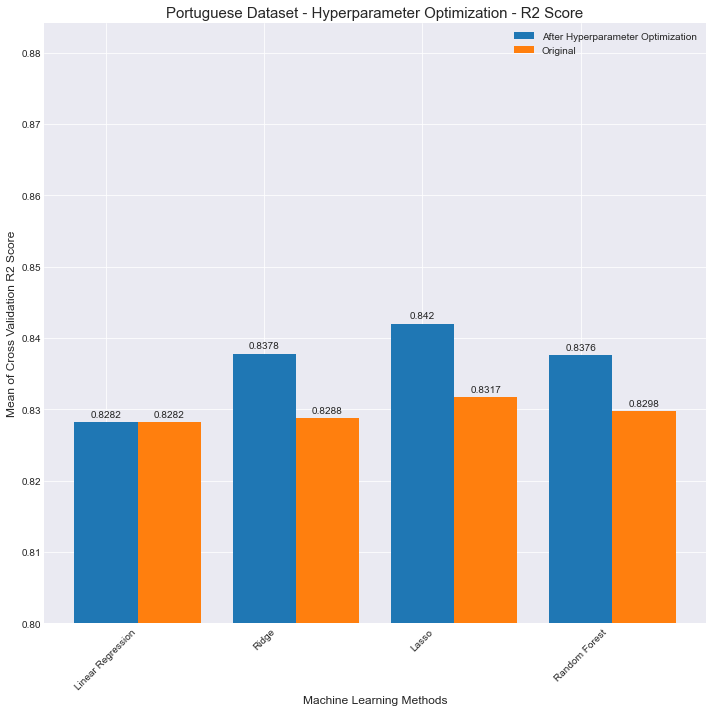

In [16]:
# R2 Cross Validation Score Graph

plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(figsize=(10,10))


r2_score_final_graph = ax.bar(x_indexes, r2_cv_score_final_round, width=width, label = 'After Hyperparameter Optimization')
r2_score_graph = ax.bar(x_indexes+width, r2_cv_score_round,width=width, label = 'Original')


autolabel(r2_score_graph)
autolabel(r2_score_final_graph)

ax.set_ylim(bottom=0.8)
ax.set_ylabel("Mean of Cross Validation R2 Score", size=12)

ax.set_xlabel('Machine Learning Methods', size=12)
ax.set_xticks(ticks = x_indexes)
ax.set_xticklabels(name, rotation=45)

ax.set_title("Portuguese Dataset - Hyperparameter Optimization - R2 Score", size = 15)
plt.legend()

plt.tight_layout()
plt.savefig("Portuguese Dataset - Hyperparameter Optimization - R2 Score.png")
plt.show()

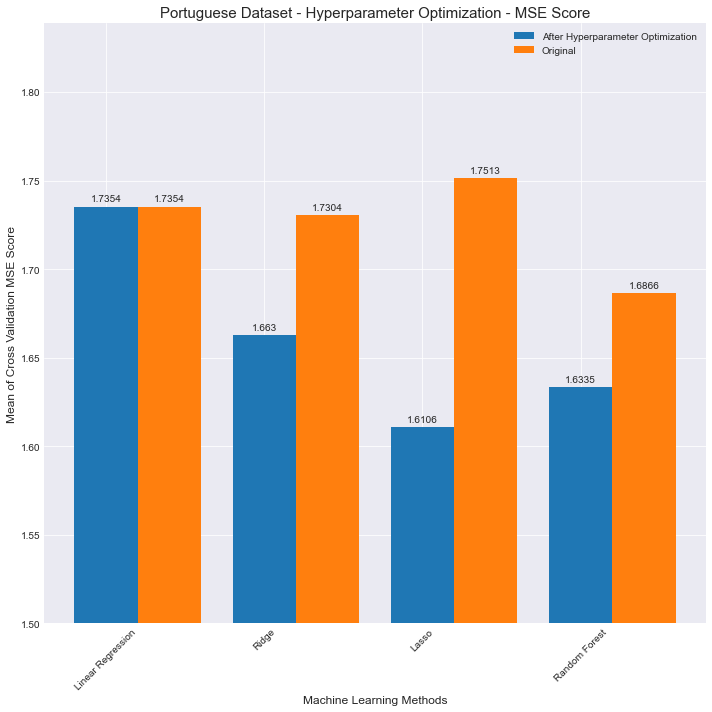

In [17]:
# MSE Cross Validation Score Graph

plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(figsize=(10,10))


mse_score_final_graph = ax.bar(x_indexes, mse_cv_score_final_round, width=width, label = 'After Hyperparameter Optimization')
mse_score_graph = ax.bar(x_indexes+width, mse_cv_score_round,width=width, label = 'Original')


autolabel(mse_score_graph)
autolabel(mse_score_final_graph)

ax.set_ylim(bottom=1.5)
ax.set_ylabel("Mean of Cross Validation MSE Score", size=12)

ax.set_xlabel('Machine Learning Methods', size=12)
ax.set_xticks(ticks = x_indexes)
ax.set_xticklabels(name, rotation=45)

ax.set_title("Portuguese Dataset - Hyperparameter Optimization - MSE Score", size = 15)
plt.legend()

plt.tight_layout()
plt.savefig("Portuguese Dataset - Hyperparameter Optimization - MSE Score.png")
plt.show()

# **Important Features**

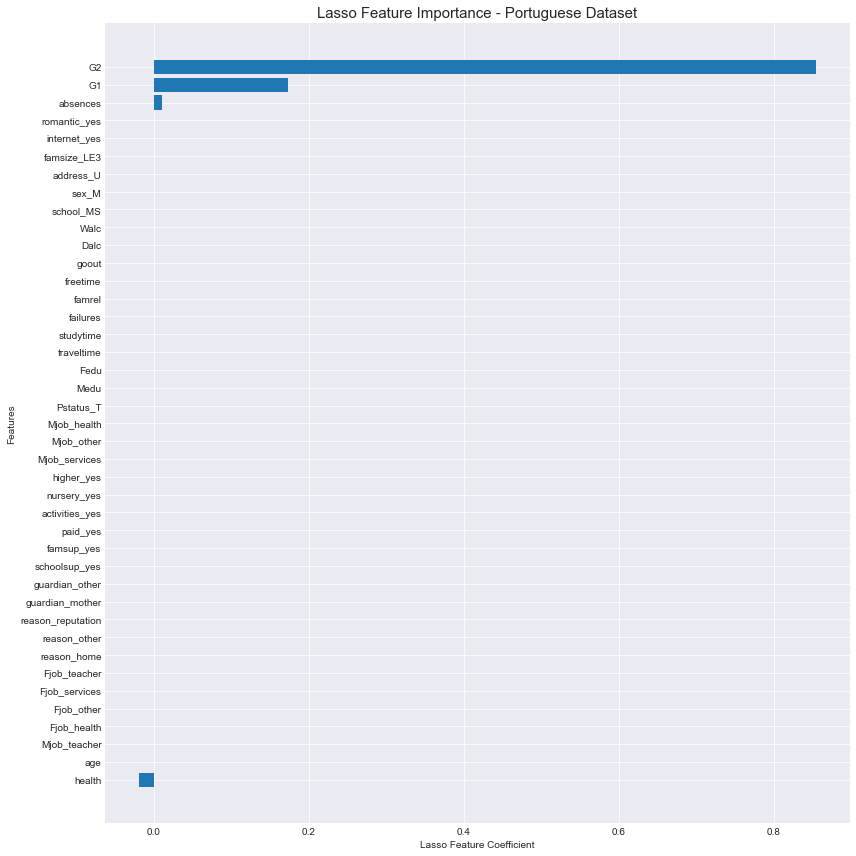

In [18]:
plt.figure(figsize=(12,12))
sorted_idx = lasso_final.coef_.argsort()
x = Xp_train.columns[sorted_idx]
y = lasso_final.coef_[sorted_idx]
plt.barh(x, y)

plt.ylabel('Features')
plt.xlabel("Lasso Feature Coefficient")
plt.title("Lasso Feature Importance - Portuguese Dataset", size = 15)

plt.tight_layout()
plt.savefig("Lasso Feature Importance - Portuguese Dataset.png")
plt.show()

In [19]:
# Feature Coefficient

feature_coef = dict(zip(x, y))
sort_orders = sorted(feature_coef.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
    print(i[0],':', i[1])

G2 : 0.8539912824962506
G1 : 0.17280865326647915
absences : 0.010934010152849302
age : 0.0
Mjob_teacher : 0.0
Fjob_health : 0.0
Fjob_other : -0.0
Fjob_services : 0.0
Fjob_teacher : -0.0
reason_home : -0.0
reason_other : -0.0
reason_reputation : -0.0
guardian_mother : -0.0
guardian_other : 0.0
schoolsup_yes : -0.0
famsup_yes : 0.0
paid_yes : -0.0
activities_yes : -0.0
nursery_yes : -0.0
higher_yes : 0.0
Mjob_services : 0.0
Mjob_other : -0.0
Mjob_health : 0.0
Pstatus_T : -0.0
Medu : 0.0
Fedu : 0.0
traveltime : 0.0
studytime : 0.0
failures : -0.0
famrel : 0.0
freetime : -0.0
goout : 0.0
Dalc : -0.0
Walc : -0.0
school_MS : -0.0
sex_M : -0.0
address_U : 0.0
famsize_LE3 : 0.0
internet_yes : 0.0
romantic_yes : 0.0
health : -0.01945184319904377


# **Predict on Test sample**

In [20]:
yp_pred = lasso_final.predict(Xp_test)

lasso_final_r2_score = r2_score(yp_test, yp_pred)
print("R2 Score:: ",lasso_final_r2_score)

R2 Score::  0.867717180800375


In [21]:
lasso_final_mse_score = mean_squared_error(yp_test, yp_pred)
print("R2 Score:: ",lasso_final_mse_score)

R2 Score::  1.6405339522621418
